<a href="https://colab.research.google.com/github/ClaFlorez/Machine_Learning_Simplifie/blob/main/K_Means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Démonstration K-Means: Segmentation de clientèle e-commerce
Dataset de clients créé:
  Nombre de clients: 1,000
  Âge moyen: 43.1 ans
  Revenu moyen: 51,504€
  Achats moyens: 46/an

Pourquoi standardiser les données ?
Avant standardisation:
  age: moyenne=43, écart-type=16
  revenu_annuel: moyenne=51504, écart-type=23276
  achats_par_an: moyenne=46, écart-type=37

Après standardisation:
  age: moyenne=-0.000, écart-type=1.000
  revenu_annuel: moyenne=-0.000, écart-type=1.000
  achats_par_an: moyenne=-0.000, écart-type=1.000

Sans standardisation: K-Means serait biaisé par les revenus (grandes valeurs)
Avec standardisation: Toutes les variables ont le même poids

Recherche du nombre optimal de clusters (méthode du coude):
K=1: Inertie=3000
K=2: Inertie=1606, Silhouette=0.435
K=3: Inertie=1034, Silhouette=0.466
K=4: Inertie=670, Silhouette=0.475
K=5: Inertie=603, Silhouette=0.410
K=6: Inertie=540, Silhouette=0.366
K=7: Inertie=485, Silhouette=0.325
K=8: Inertie=443, Silhouette=0.294
K=9:

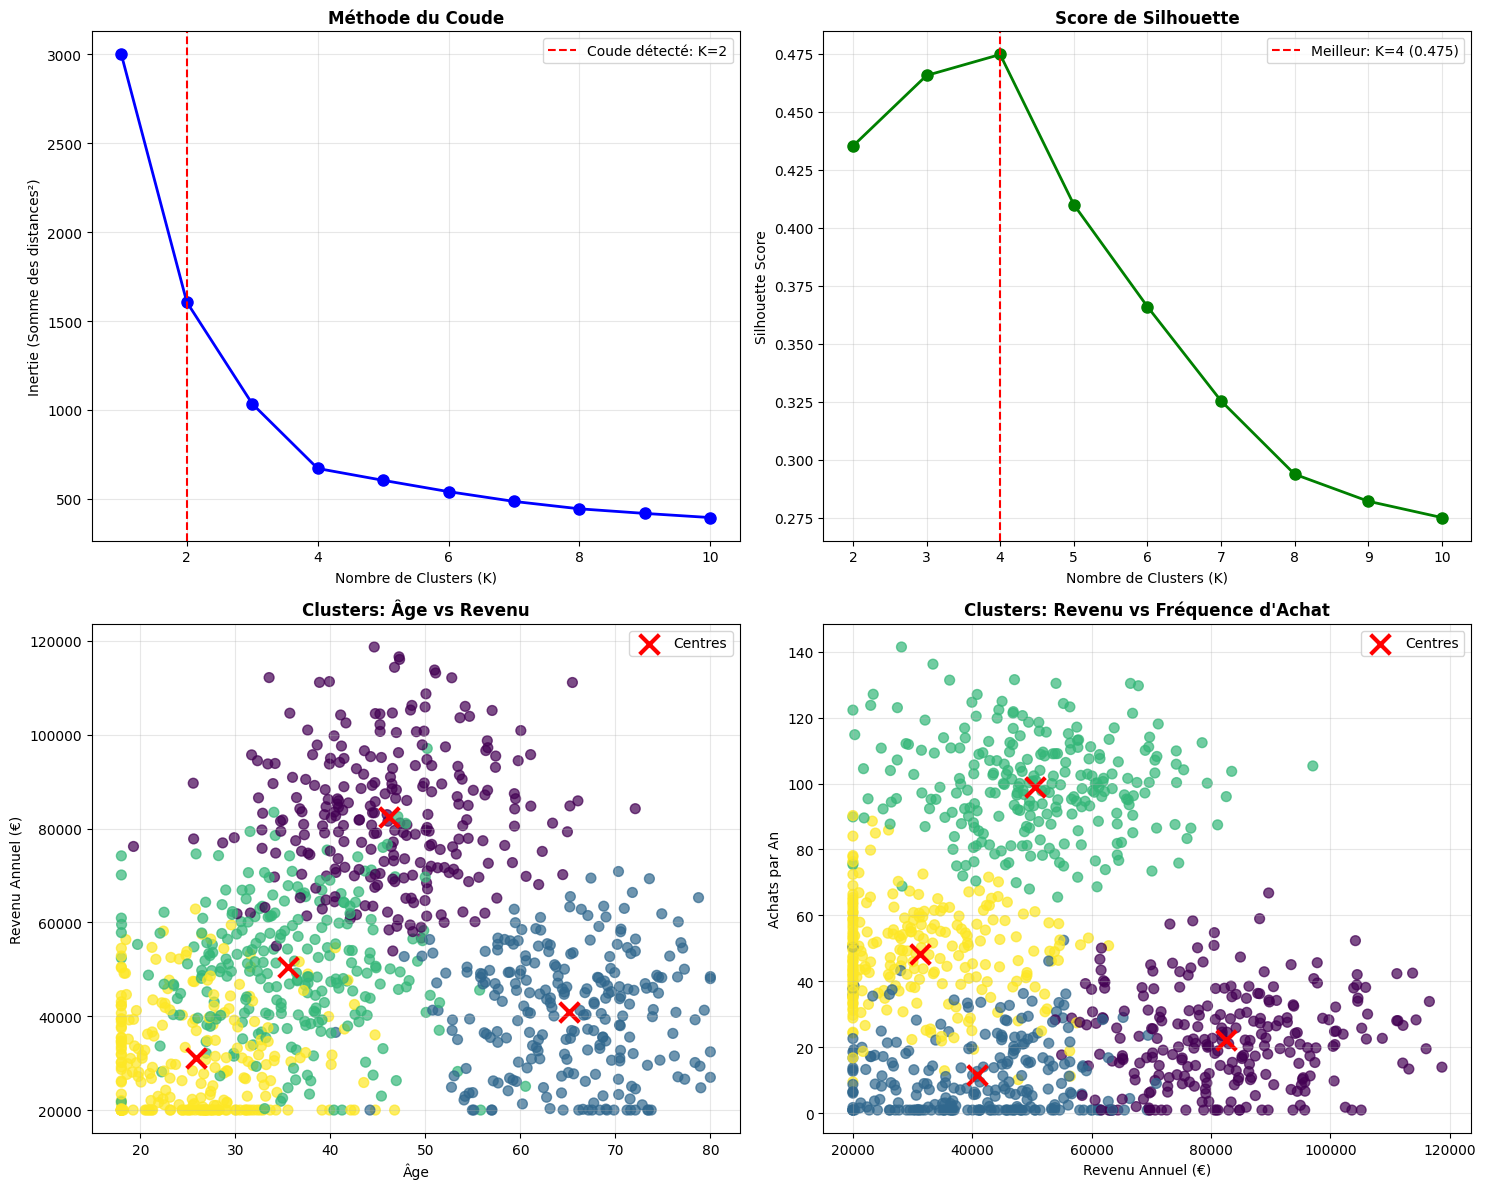


Analyse détaillée des 4 clusters trouvés:

Cluster 0 (254 clients - 25.4%):
  Âge moyen: 46.2 ans
  Revenu moyen: 82,485€
  Achats moyens: 22/an
  → Profil identifié: Clients Premium
  → Description: Revenus élevés, potentiel d'achat important
  → Stratégie marketing: Produits exclusifs, service VIP

Cluster 1 (245 clients - 24.5%):
  Âge moyen: 65.1 ans
  Revenu moyen: 40,871€
  Achats moyens: 12/an
  → Profil identifié: Seniors Sélectifs
  → Description: Clients matures, achètent peu mais qualité
  → Stratégie marketing: Produits haut de gamme, service personnalisé

Cluster 2 (254 clients - 25.4%):
  Âge moyen: 35.6 ans
  Revenu moyen: 50,460€
  Achats moyens: 99/an
  → Profil identifié: Familles Actives
  → Description: Segment principal, achats réguliers
  → Stratégie marketing: Gamme large, promotions familiales

Cluster 3 (247 clients - 24.7%):
  Âge moyen: 25.9 ans
  Revenu moyen: 31,266€
  Achats moyens: 48/an
  → Profil identifié: Jeunes Économes
  → Description: Jeunes clien

In [1]:
#K-Means clustering complet
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Créer un dataset de clients e-commerce réaliste
print("Démonstration K-Means: Segmentation de clientèle e-commerce")
print("=" * 70)

np.random.seed(42)
n_customers = 1000

# Générer des profils clients réalistes
# Simuler 4 segments naturels mais cachés
centers = [
    [25, 30000, 50],    # Jeunes avec revenus moyens, achats fréquents
    [45, 80000, 20],    # Cadres aisés, achats occasionnels mais chers
    [35, 50000, 100],   # Familles, achats très fréquents
    [65, 40000, 10]     # Seniors, achats rares
]

# Générer les données avec du bruit
age_data = []
revenu_data = []
achats_par_an_data = []

for center in centers:
    n_in_cluster = n_customers // 4

    # Ajouter du bruit autour de chaque centre
    ages = np.random.normal(center[0], 8, n_in_cluster)
    revenus = np.random.normal(center[1], 15000, n_in_cluster)
    achats = np.random.normal(center[2], 15, n_in_cluster)

    age_data.extend(ages)
    revenu_data.extend(revenus)
    achats_par_an_data.extend(achats)

# Mélanger et nettoyer
indices = np.random.permutation(len(age_data))
ages = np.array(age_data)[indices]
revenus = np.array(revenu_data)[indices]
achats_par_an = np.array(achats_par_an_data)[indices]

# Garder des valeurs réalistes
ages = np.clip(ages, 18, 80)
revenus = np.clip(revenus, 20000, 150000)
achats_par_an = np.clip(achats_par_an, 1, 200)

# Créer le DataFrame
customers_df = pd.DataFrame({
    'age': ages,
    'revenu_annuel': revenus,
    'achats_par_an': achats_par_an
})

print(f"Dataset de clients créé:")
print(f"  Nombre de clients: {len(customers_df):,}")
print(f"  Âge moyen: {customers_df['age'].mean():.1f} ans")
print(f"  Revenu moyen: {customers_df['revenu_annuel'].mean():,.0f}€")
print(f"  Achats moyens: {customers_df['achats_par_an'].mean():.0f}/an")

# Standardiser les données (important pour K-Means)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(customers_df)

print(f"\nPourquoi standardiser les données ?")
print("=" * 40)
print("Avant standardisation:")
for i, col in enumerate(customers_df.columns):
    print(f"  {col}: moyenne={customers_df[col].mean():.0f}, écart-type={customers_df[col].std():.0f}")

print(f"\nAprès standardisation:")
for i, col in enumerate(customers_df.columns):
    print(f"  {col}: moyenne={X_scaled[:, i].mean():.3f}, écart-type={X_scaled[:, i].std():.3f}")

print(f"\nSans standardisation: K-Means serait biaisé par les revenus (grandes valeurs)")
print("Avec standardisation: Toutes les variables ont le même poids")

# Méthode du coude pour trouver K optimal
print(f"\nRecherche du nombre optimal de clusters (méthode du coude):")
print("=" * 60)

K_range = range(1, 11)
inertias = []
silhouette_scores = []

from sklearn.metrics import silhouette_score

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)

    if k > 1:  # Silhouette score nécessite au moins 2 clusters
        sil_score = silhouette_score(X_scaled, kmeans.labels_)
        silhouette_scores.append(sil_score)
        print(f"K={k}: Inertie={kmeans.inertia_:.0f}, Silhouette={sil_score:.3f}")
    else:
        silhouette_scores.append(0)
        print(f"K={k}: Inertie={kmeans.inertia_:.0f}")

# Visualiser la méthode du coude
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 1. Courbe du coude (inertie)
axes[0, 0].plot(K_range, inertias, 'bo-', linewidth=2, markersize=8)
axes[0, 0].set_title('Méthode du Coude', fontweight='bold')
axes[0, 0].set_xlabel('Nombre de Clusters (K)')
axes[0, 0].set_ylabel('Inertie (Somme des distances²)')
axes[0, 0].grid(True, alpha=0.3)

# Détecter le coude automatiquement
# Méthode simple: plus grande différence de pente
differences = np.diff(inertias)
second_differences = np.diff(differences)
elbow_point = np.argmax(second_differences) + 2  # +2 car on a fait 2 diff

axes[0, 0].axvline(elbow_point, color='red', linestyle='--',
                  label=f'Coude détecté: K={elbow_point}')
axes[0, 0].legend()

# 2. Silhouette score
axes[0, 1].plot(range(2, 11), silhouette_scores[1:], 'go-', linewidth=2, markersize=8)
axes[0, 1].set_title('Score de Silhouette', fontweight='bold')
axes[0, 1].set_xlabel('Nombre de Clusters (K)')
axes[0, 1].set_ylabel('Silhouette Score')
axes[0, 1].grid(True, alpha=0.3)

# Marquer le meilleur silhouette score
best_sil_k = np.argmax(silhouette_scores[1:]) + 2
best_sil_score = max(silhouette_scores[1:])
axes[0, 1].axvline(best_sil_k, color='red', linestyle='--',
                  label=f'Meilleur: K={best_sil_k} ({best_sil_score:.3f})')
axes[0, 1].legend()

print(f"\nAnalyse automatique:")
print(f"  Coude détecté à K={elbow_point}")
print(f"  Meilleur silhouette score à K={best_sil_k}")

# Choisir K=4 (on sait qu'il y a 4 segments naturels)
k_optimal = 4
kmeans_final = KMeans(n_clusters=k_optimal, random_state=42, n_init=10)
clusters = kmeans_final.fit_predict(X_scaled)

# Ajouter les clusters au DataFrame
customers_df['cluster'] = clusters

# 3. Visualisation des clusters (2D projection)
# Prendre les 2 premières variables pour la visualisation
axes[1, 0].scatter(customers_df['age'], customers_df['revenu_annuel'],
                  c=clusters, cmap='viridis', alpha=0.7, s=50)

# Ajouter les centres des clusters (retransformés)
centers_original = scaler.inverse_transform(kmeans_final.cluster_centers_)
axes[1, 0].scatter(centers_original[:, 0], centers_original[:, 1],
                  c='red', marker='x', s=200, linewidths=3, label='Centres')

axes[1, 0].set_title('Clusters: Âge vs Revenu', fontweight='bold')
axes[1, 0].set_xlabel('Âge')
axes[1, 0].set_ylabel('Revenu Annuel (€)')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

# 4. Autre vue: Revenu vs Achats
axes[1, 1].scatter(customers_df['revenu_annuel'], customers_df['achats_par_an'],
                  c=clusters, cmap='viridis', alpha=0.7, s=50)
axes[1, 1].scatter(centers_original[:, 1], centers_original[:, 2],
                  c='red', marker='x', s=200, linewidths=3, label='Centres')

axes[1, 1].set_title('Clusters: Revenu vs Fréquence d\'Achat', fontweight='bold')
axes[1, 1].set_xlabel('Revenu Annuel (€)')
axes[1, 1].set_ylabel('Achats par An')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Analyser chaque cluster
print(f"\nAnalyse détaillée des {k_optimal} clusters trouvés:")
print("=" * 60)

cluster_names = []
for cluster_id in range(k_optimal):
    cluster_data = customers_df[customers_df['cluster'] == cluster_id]

    avg_age = cluster_data['age'].mean()
    avg_revenu = cluster_data['revenu_annuel'].mean()
    avg_achats = cluster_data['achats_par_an'].mean()
    taille_cluster = len(cluster_data)

    print(f"\nCluster {cluster_id} ({taille_cluster} clients - {taille_cluster/len(customers_df)*100:.1f}%):")
    print(f"  Âge moyen: {avg_age:.1f} ans")
    print(f"  Revenu moyen: {avg_revenu:,.0f}€")
    print(f"  Achats moyens: {avg_achats:.0f}/an")

    # Donner un nom au cluster basé sur les caractéristiques
    if avg_age < 35 and avg_revenu < 40000:
        nom = "Jeunes Économes"
        description = "Jeunes clients avec budget limité mais fidèles"
        strategie = "Prix attractifs, promotions, programmes de fidélité"
    elif avg_age > 50 and avg_achats < 30:
        nom = "Seniors Sélectifs"
        description = "Clients matures, achètent peu mais qualité"
        strategie = "Produits haut de gamme, service personnalisé"
    elif avg_revenu > 60000:
        nom = "Clients Premium"
        description = "Revenus élevés, potentiel d'achat important"
        strategie = "Produits exclusifs, service VIP"
    else:
        nom = "Familles Actives"
        description = "Segment principal, achats réguliers"
        strategie = "Gamme large, promotions familiales"

    cluster_names.append(nom)

    print(f"  → Profil identifié: {nom}")
    print(f"  → Description: {description}")
    print(f"  → Stratégie marketing: {strategie}")

# Calculer la qualité du clustering
inertia_finale = kmeans_final.inertia_
silhouette_finale = silhouette_score(X_scaled, clusters)

print(f"\nQualité du clustering:")
print("=" * 30)
print(f"Inertie finale: {inertia_finale:.0f}")
print(f"Silhouette score: {silhouette_finale:.3f}")

if silhouette_finale > 0.5:
    print("✅ Excellente séparation des clusters")
elif silhouette_finale > 0.3:
    print("✅ Bonne séparation des clusters")
elif silhouette_finale > 0.1:
    print("⚠️ Séparation modérée")
else:
    print("❌ Séparation faible - revoir l'approche")

# Analyser la stabilité du clustering
print(f"\nTest de stabilité (10 initialisations différentes):")
print("=" * 60)

stabilite_scores = []
for i in range(10):
    kmeans_test = KMeans(n_clusters=k_optimal, random_state=i, n_init=10)
    clusters_test = kmeans_test.fit_predict(X_scaled)

    # Calculer l'accord avec notre clustering de référence
    from sklearn.metrics import adjusted_rand_score
    accord = adjusted_rand_score(clusters, clusters_test)
    stabilite_scores.append(accord)

stabilite_moyenne = np.mean(stabilite_scores)
print(f"Stabilité moyenne (Adjusted Rand Score): {stabilite_moyenne:.3f}")

if stabilite_moyenne > 0.8:
    print("✅ Clustering très stable")
elif stabilite_moyenne > 0.6:
    print("✅ Clustering assez stable")
else:
    print("⚠️ Clustering instable - résultats variables")

# Recommandations business
print(f"\nRecommandations business par segment:")
print("=" * 50)

for cluster_id, nom in enumerate(cluster_names):
    cluster_data = customers_df[customers_df['cluster'] == cluster_id]
    valeur_client = cluster_data['revenu_annuel'].mean() * cluster_data['achats_par_an'].mean() / 100000

    print(f"\n{nom} (Cluster {cluster_id}):")
    print(f"  Taille: {len(cluster_data)} clients ({len(cluster_data)/len(customers_df)*100:.1f}%)")
    print(f"  Valeur estimée: {valeur_client:.1f}/10")

    if valeur_client > 7:
        print("  → PRIORITÉ HAUTE: Segment très valuable")
    elif valeur_client > 5:
        print("  → PRIORITÉ MOYENNE: Segment important")
    else:
        print("  → PRIORITÉ BASSE: Segment à développer")

# Limites de K-Means
print(f"\nLimites de K-Means à connaître:")
print("=" * 40)
print("❌ Suppose des clusters sphériques")
print("❌ Sensible aux valeurs aberrantes")
print("❌ Nécessite de choisir K à l'avance")
print("❌ Peut donner des résultats différents selon l'initialisation")
print("❌ Assume que tous les clusters ont une taille similaire")

print(f"\n✅ Avantages de K-Means:")
print("✅ Simple à comprendre et implémenter")
print("✅ Très rapide même sur de gros datasets")
print("✅ Fonctionne bien quand les assumptions sont respectées")
print("✅ Résultats facilement interprétables")

# Guide pratique d'utilisation
print(f"\nGuide pratique d'utilisation de K-Means:")
print("=" * 50)
print("1. PRÉPAREZ vos données:")
print("   • Standardisez toutes les variables")
print("   • Supprimez les valeurs aberrantes extrêmes")
print("   • Sélectionnez les features pertinentes")

print("\n2. CHOISISSEZ K:")
print("   • Utilisez la méthode du coude")
print("   • Validez avec le silhouette score")
print("   • Considérez l'interprétabilité business")

print("\n3. VALIDEZ les résultats:")
print("   • Testez la stabilité avec différentes initialisations")
print("   • Vérifiez que les clusters ont du sens métier")
print("   • Analysez la séparation entre clusters")

print("\n4. INTERPRÉTEZ pour le business:")
print("   • Donnez des noms parlants aux clusters")
print("   • Définissez des stratégies par segment")
print("   • Mesurez la valeur de chaque segment")
